In [0]:
from pyspark.sql.functions import col, count

# Count the number of rows for each MMSI
mmsi_counts_df = spark.read.table("ais.june").groupBy("MMSI").agg(count("*").alias("RowCount"))

# Display the resulting DataFrame
mmsi_counts_df.show()

+---------+--------+
|     MMSI|RowCount|
+---------+--------+
|367666080|   10125|
|235076276|   13972|
|316004659|   31420|
|368012290|   11587|
|338329987|     120|
|367162230|   18430|
|367675910|   24283|
|367522340|     176|
|367627020|    2223|
|368661000|   12720|
|367057260|   36608|
|367540650|   12955|
|369970434|   35363|
|367663890|   26313|
|368132360|   33230|
|367098280|   28174|
|368049620|   13328|
|367732510|   11110|
|368242030|   14431|
|367053940|   36352|
+---------+--------+
only showing top 20 rows



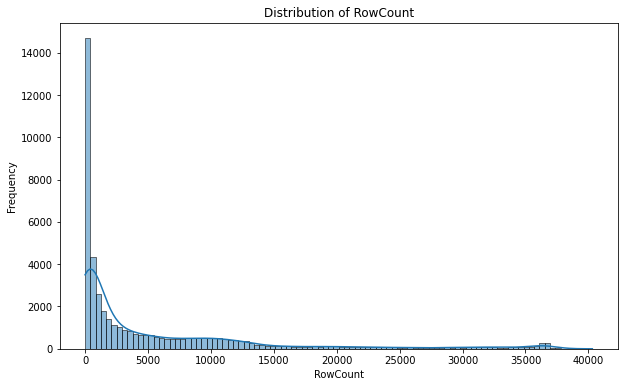

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the MMSI counts DataFrame to Pandas
mmsi_counts_pd = mmsi_counts_df.toPandas()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram of RowCount values
sns.histplot(data=mmsi_counts_pd, x="RowCount", kde=True)

# Set the plot title and labels
plt.title("Distribution of RowCount")
plt.xlabel("RowCount")
plt.ylabel("Frequency")

# Display the plot
plt.show()


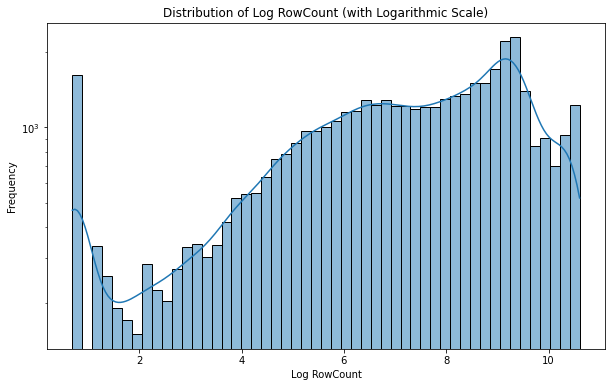

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert the MMSI counts DataFrame to Pandas
mmsi_counts_pd = mmsi_counts_df.toPandas()

# Set the figure size
plt.figure(figsize=(10, 6))

# Apply logarithmic transformation to RowCount values
mmsi_counts_pd['Log_RowCount'] = np.log1p(mmsi_counts_pd['RowCount'])

# Create a histogram of Log_RowCount values
sns.histplot(data=mmsi_counts_pd, x="Log_RowCount", kde=True)

# Set the plot title and labels
plt.title("Distribution of Log RowCount (with Logarithmic Scale)")
plt.xlabel("Log RowCount")
plt.ylabel("Frequency")

# Set the y-axis to logarithmic scale
plt.yscale("log")

# Display the plot
plt.show()


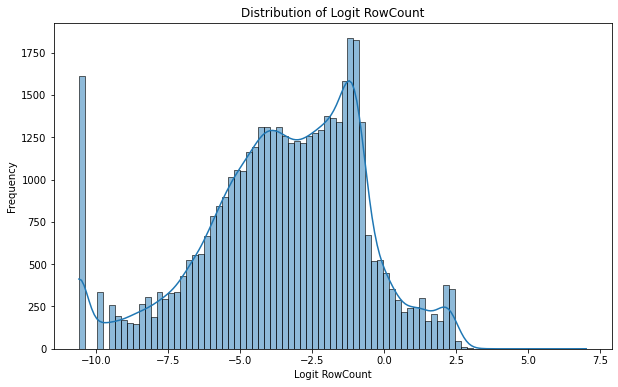

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import logit

# Convert the MMSI counts DataFrame to Pandas
mmsi_counts_pd = mmsi_counts_df.toPandas()

# Set the figure size
plt.figure(figsize=(10, 6))

# Apply logit transformation to RowCount values
mmsi_counts_pd['Logit_RowCount'] = logit(mmsi_counts_pd['RowCount'] / mmsi_counts_pd['RowCount'].max())

# Create a histogram of Logit_RowCount values
sns.histplot(data=mmsi_counts_pd, x="Logit_RowCount", kde=True)

# Set the plot title and labels
plt.title("Distribution of Logit RowCount")
plt.xlabel("Logit RowCount")
plt.ylabel("Frequency")

# Display the plot
plt.show()


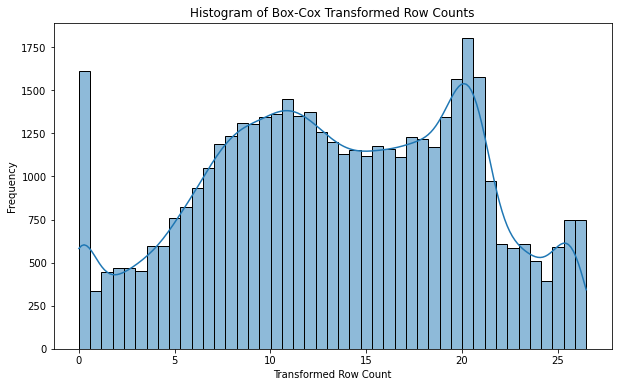

Estimated Lambda Value: 0.15255473287974522


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Convert the RowCount column to a NumPy array
row_counts = mmsi_counts_df.select("RowCount").rdd.flatMap(lambda x: x).collect()
data = np.array(row_counts)

# Perform the Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(data)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram of the transformed data
sns.histplot(transformed_data, kde=True)

# Set the plot title and labels
plt.title("Histogram of Box-Cox Transformed Row Counts")
plt.xlabel("Transformed Row Count")
plt.ylabel("Frequency")

# Display the plot
plt.show()

# Print the estimated lambda value
print("Estimated Lambda Value:", lambda_value)


The estimated lambda value of 0.15255473287974522 provides insight into the transformation applied to the row counts. In the case of the Box-Cox transformation, the lambda value indicates the power parameter used in the transformation. 

- If the lambda value is close to 0, it suggests a logarithmic transformation. In this case, the transformed data would approximate a logarithmic scale.

- If the lambda value is 1, it indicates a simple identity transformation. The transformed data would be equivalent to the original data.

- If the lambda value is not equal to 0 or 1, it represents a power transformation. The transformed data would follow a power-law relationship, where the magnitude of the transformation is determined by the value of lambda.

The estimated lambda value of 0.15255473287974522 suggests a moderate transformation applied to the row counts. It indicates a power transformation, but not as strong as a logarithmic or identity transformation.